In [180]:
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

Things We should look at 
- how homogenous are today's festivals?
- what are the festivals that stand out as most unique? most median?
- what bands are the most "promiscuous" festival acts?
- are there other interesting patterns that indicate "behind the scenes" factors, such as shared booking/promoters, etc.?
- if you made a "consensus" festival for 2016, what would it look like? (would be great to design a fake poster for this)


In [241]:
df = pd.read_csv('/Users/hunterowens/Downloads/2016 Festivals - ByOrder.csv')

In [242]:
df.drop([0,1], inplace=True)
df.drop(['AVG RANK','# OF FESTS', 'PWR RANKING', 'Unnamed: 4', 'Unnamed: 20', 'Unnamed: 19',
        'BUMBERSHT', 'ACL', 'PITCHFORK', 'OUTSIDELDS'], axis=1, inplace=True)
df.set_index('ARTIST', inplace=True)

## Homogentity Score
- How similar to the avg festival is this festival 
- Computed Value is the Percentage of the Festival that appears in another fesitival 

In [243]:
def compute_percentage_of_lineup_in_other_festivals(lineup, df): 
    """Given a lineup from d[FESTIVAL_NAME], tell me what percentage is in another festival """
    sum_lineup = df[lineup].count()
    all_artists_from_other_fests = df.drop(lineup, axis=1).dropna(how='all').index.get_values()
    fest_lineup_list = df[lineup].dropna().index.get_values()
    common_artists_sum = len(set(all_artists_from_other_fests).intersection(fest_lineup_list))
    percentage = common_artists_sum / sum_lineup
    return percentage

In [244]:
d = {}
for column in df.columns.get_values():
    d[column] = compute_percentage_of_lineup_in_other_festivals(column, df)

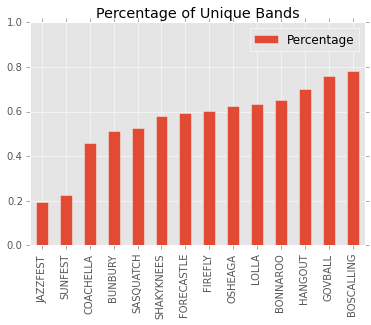

In [245]:
percentage_fest_df = pd.DataFrame.from_dict(d, orient='Index')
percentage_fest_df.columns = ['Percentage']
percentage_fest_df.sort_values(by='Percentage').plot(kind='Bar',
                                                     title="Percentage of Unique Bands",
                                                     ylim=(0,1))

## Percentage of Unique Bands in Percentiles of Lineup 

In [350]:
def compute_percentage_of_lineup_in_other_festivals_percentile(lineup, df, percentile=1): 
    """Given a lineup from d[FESTIVAL_NAME], tell me what percentage is in another festival. 
    Give a percentage of a lineup to cut by"""
    # get the sum
    sum_lineup = df[lineup].count()
    # get number in which to grab greater than
    sort_value = df[lineup].dropna().astype(int).sort_values().quantile(percentile)
    greater_than_true_series = df[lineup].dropna().astype(int) > sort_value
    fest_lineup_list = greater_than_true_series[greater_than_true_series == True].index.get_values()
    all_artists_from_other_fests = df.drop(lineup, axis=1).dropna(how='all').index.get_values()
    common_artists_sum = len(set(all_artists_from_other_fests).intersection(fest_lineup_list))
    percentage = common_artists_sum / sum_lineup
    return percentage

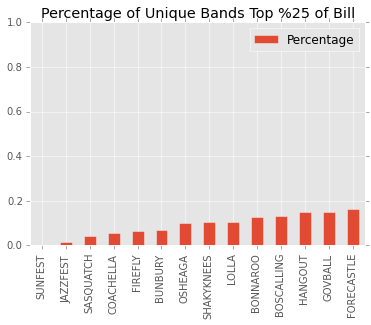

In [354]:
d = {}
for column in df.columns.get_values():
    d[column] = compute_percentage_of_lineup_in_other_festivals_percentile(column, df, .75)
percentage_fest_df = pd.DataFrame.from_dict(d, orient='Index')
percentage_fest_df.columns = ['Percentage']
percentage_fest_df.sort_values(by='Percentage').plot(kind='Bar',
                                                     title="Percentage of Unique Bands Top %25 of Bill",
                                                     ylim=(0,1))

## What about bands
- What are the top 10 most promiscious bands? 

In [214]:
df.count(axis=1).sort_values(ascending=False).head(25)

ARTIST
Vince Staples                            9
M83                                      7
Haim                                     7
Nathaniel Rateliff & the Night Sweats    7
Disclosure                               6
Grimes                                   6
Elle King                                6
Big Grams                                6
Oh Wonder                                5
Miike Snow                               5
Bully                                    5
Walk The Moon                            5
Coleman Hell                             5
Ellie Goulding                           5
Silversun Pickups                        5
Marian Hill                              5
Foals                                    5
Kurt Vile & The Violators                5
Death Cab for Cutie                      5
Leon Bridges                             5
X Ambassadors                            5
The Struts                               5
Florence + The Machine                   5
Loui

In [221]:
df.index.summary()

'Index: 759 entries, 1200 to ZZ Top'